ka 0.0025 kd 0.502654824574 kon 0.00248762755556
p 0.0147313912747
dt 6.66666666667e-05
x [ 0.          0.58022177  0.8205575 ]
tau 4.89847620446e-09
kt [0.0025000000000000005, 0.0024947557585824781, 0.0024935969552941752]
[0.00248793821067001, 0.0024879381071526447, 0.0024879380037386937]
kt/ka [1.0000000000000002, 0.99790230343299124, 0.99743878211767001]
st [1.0, 0.9999833509527349, 0.9999667235254326]


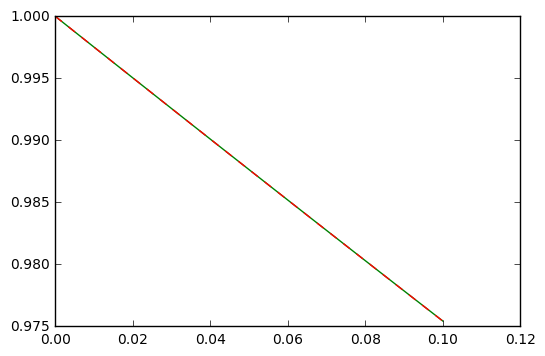

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ecell4 import *

def phi(x):
    return [1./( (377.*xx/324)+(1+ (314.*(xx**2)/847) )**0.5) for xx in x]

voxelr=0.005*2

D = 1
kd= 4.0*math.pi*D*4*voxelr
ka=0.0025#0.01*kd
kon = kd*ka/(kd+ka)

print 'ka',ka,'kd',kd,'kon',kon
print 'p',ka/(6*(2**0.5)*2*D*voxelr)
dt = (2.*voxelr)**2/6./D
print 'dt',dt
N=100
V2=1
tau = ((ka*2*voxelr/(ka+kd))**2)/(2*D)
T=0.1
tt= np.arange(0,T,dt)
x = ka*((tt/tau)**(0.5))/kd
print 'x',x[:3]
print 'tau',tau
phis = phi(x)

#kt = [kon for phi in phis]
kt = [kon*(1+(ka*p/kd)) for p in phis]
ktdka = [j/ka for j in kt]
st = []
for i in range(len(tt)):
    st.append(math.exp(-(N/V2)*np.trapz(kt[0:i+1],dx=dt)))
print 'kt',kt[:3]
print kt[-3:]
print 'kt/ka',ktdka[:3]
print 'st',st[:3]
#plt.plot(tt,kt,'.')

with reaction_rules():#for ODE
    A + B > B | kon
m1 = get_model()

ode = np.array(run_simulation(T, model=m1, y0={'A': N,'B': N}, solver='ode', volume=V2, return_type='array'))
to = ode[:,0]
nao = ode[:,1]

plt.plot(to,nao/N,'g-')
plt.plot(tt,st,'r--',label='theory')
plt.show()